# Filtering with Pyleoclim

A common task that befalls the analyst is to filter timeseries to highlight signals of interest. In this notebook we illustrate how easy this is in *Pyleoclim*.

First let's import this and other useful packages, as well as the example data:

In [1]:
%load_ext autoreload
%autoreload 2
import pyleoclim as pyleo
import scipy.io as sio
pyleo.set_style('web') # set graphic style

data = sio.loadmat('../example_data/wtc_test_data_nino.mat')
air = data['air'][:, 0]
nino = data['nino'][:, 0]
t = data['datayear'][:, 0]

## 1. Setting the stage

As usual, we start by putting the data into *Pyleoclim* `Series` objects for easy manipulation

In [2]:
ts_air = pyleo.Series(time=t, value=air, value_name='Index', time_name='Time', time_unit='yr')
ts_nino = pyleo.Series(time=t, value=nino, value_name='SST anom.', value_unit='K', time_name='Time', time_unit='yr')

Now that the objects are defined, it's ready to do some visualization.
Note that the visualization style has been automatically customized when we import the *Pyleoclim* package. 

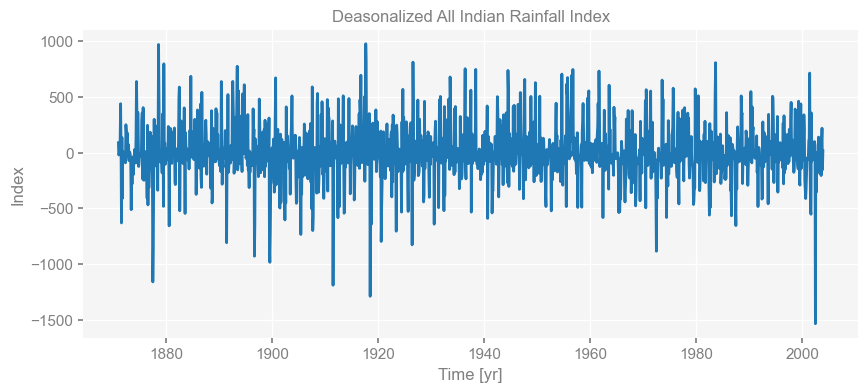

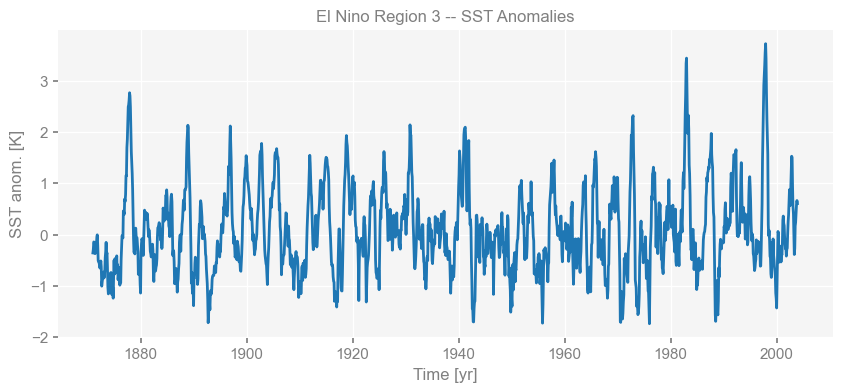

In [3]:
fig, ax = ts_air.plot(title='Deasonalized All Indian Rainfall Index')
fig, ax = ts_nino.plot(title='El Nino Region 3 -- SST Anomalies')

There are many ways to assess relationships between series. At high frequency there is no obvious relationship, as can be found when applying causality analysis (cf pyleoclim_ui_tutorial).  But what about relationship at timescales longer than 1 years ("interannual"), specifically the canonical ENSO band of 2-7 years. To assess it, *Pyleoclim* facilitates 2 sorts of filter:  (1) frequency-based filters and (2) time-based filters.

## 2. frequency-based filters

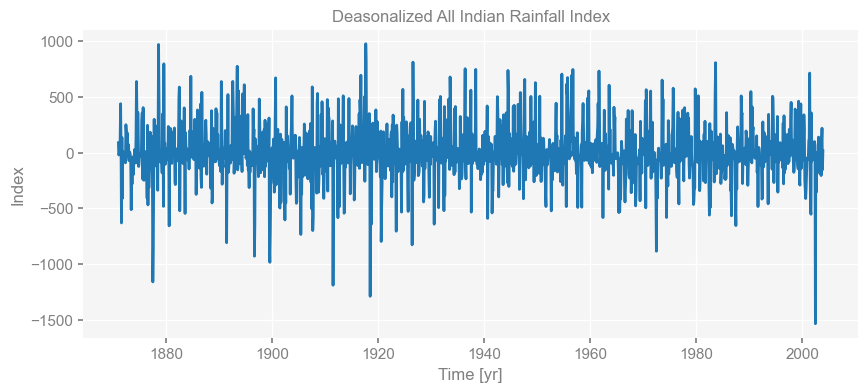

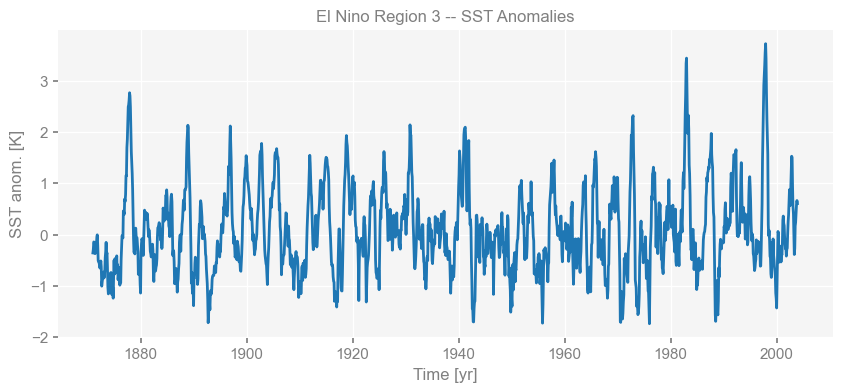

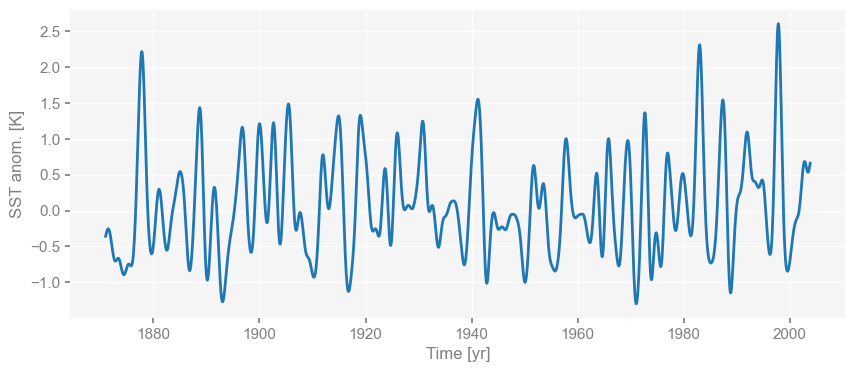

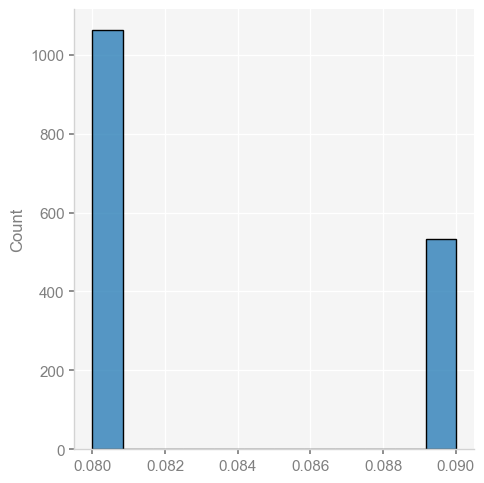

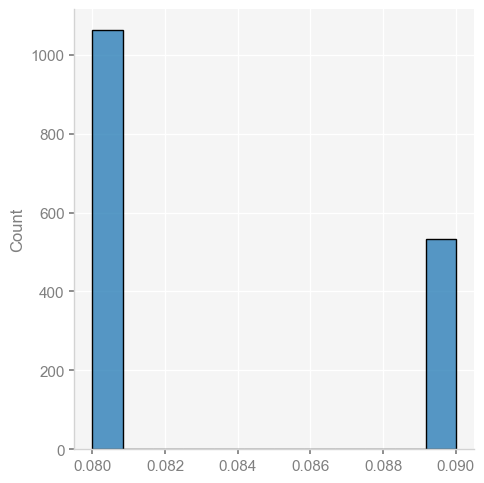

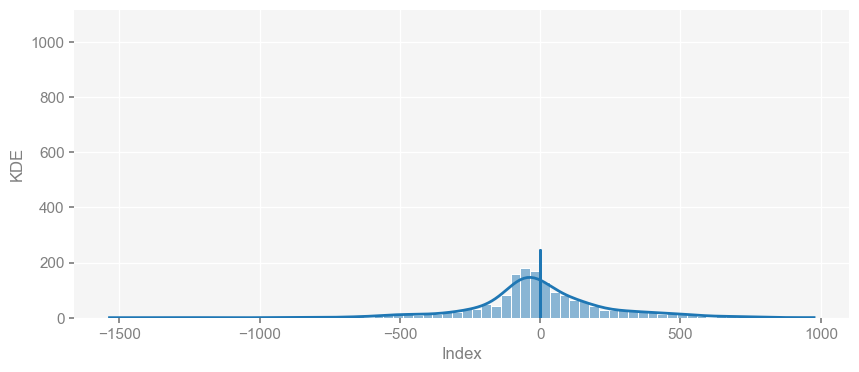

In [21]:
import numpy as np
import matplotlib.pyplot as plt
dt  = np.diff(ts_nino.time)
plt.hist(dt)
plt.show()
#ts_air.distplot()

### 2.1 lowpass filtering

In [22]:
#nino_i = ts_nino.interp()
#nino_i.filter(cutoff_scale=2).plot('NINO3, 2y lowpass filter')
air_i = ts_air.interp()
air_i.filter(cutoff_scale=2).plot('All India Rainfall, 2y lowpass filter')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

padding, edge effects, etc

## 3. Time-based filter: Singular Spectrum analysis